In [23]:
# rpy2 is a Python package that allows you to run R code from Python
%pip install rpy2

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Load the rpy2 extension to use R in Jupyter
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [25]:
%%R
# Install required packages
if (require("dplyr") == FALSE) {
  install.packages("dplyr")
  library(dplyr)
}
if (require("zoo") == FALSE) {
  install.packages("zoo")
  library(zoo)
}

if (require("forecast") == FALSE) {
  install.packages("forecast")
  library(forecast)
}
if (require("tseries") == FALSE) {
  install.packages("tseries")
  library(tseries)
}
if (require("moments") == FALSE) {
  install.packages("moments")
  library(moments)
}
if (require("tibble") == FALSE) {
  install.packages("tibble")
  library(tibble)
}
if (require("urca") == FALSE) {
  install.packages("urca")
  library(urca)
}
if (require("kableExtra") == FALSE) {
  install.packages("kableExtra")
  library(kableExtra)
}

In [26]:
%%R

nbp <- read.csv("../data/interpolated/nbp_close_interpolated.csv")
peg <- read.csv("../data/interpolated/peg_close_interpolated.csv")
the <- read.csv("../data/interpolated/the_close_interpolated.csv")
ttf <- read.csv("../data/interpolated/ttf_close_interpolated.csv")
ztp <- read.csv("../data/interpolated/ztp_close_interpolated.csv")

print(adf.test(nbp$CLOSE, k = 5))
print(adf.test(peg$CLOSE, k = 5))
print(adf.test(the$CLOSE, k = 5))
print(adf.test(ttf$CLOSE, k = 5))
print(adf.test(ztp$CLOSE, k = 5))




	Augmented Dickey-Fuller Test

data:  nbp$CLOSE
Dickey-Fuller = -2.9848, Lag order = 5, p-value = 0.1614
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  peg$CLOSE
Dickey-Fuller = -2.7475, Lag order = 5, p-value = 0.2619
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  the$CLOSE
Dickey-Fuller = -2.2454, Lag order = 5, p-value = 0.4744
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ttf$CLOSE
Dickey-Fuller = -2.2424, Lag order = 5, p-value = 0.4757
alternative hypothesis: stationary


	Augmented Dickey-Fuller Test

data:  ztp$CLOSE
Dickey-Fuller = -2.5844, Lag order = 5, p-value = 0.3309
alternative hypothesis: stationary



In [27]:
%%R
# Function to add stars based on p-values
add_stars <- function(p_value) {
  if (p_value <= 0.01) {
    return("***")
  } else if (p_value <= 0.05) {
    return("**")
  } else if (p_value <= 0.1) {
    return("*")
  } else {
    return("")
  }
}

# Define a function to calculate the statistics with 5 lags and format the results
calculate_statistics <- function(data) {
  # Use formatC to ensure a width of 5 characters (including both integer and decimal places)
  mean_val <- formatC(mean(data, na.rm = TRUE), format = "f", digits = 3, width = 5)
  sd_val <- formatC(sd(data, na.rm = TRUE), format = "f", digits = 3, width = 5)
  skewness_val <- formatC(skewness(data, na.rm = TRUE), format = "f", digits = 4, width = 5)
  kurtosis_val <- formatC(kurtosis(data, na.rm = TRUE), format = "f", digits = 4, width = 5)
  
  jarque_bera_test <- jarque.test(data)
  ljung_box_test <- Box.test(data, lag = 5, type = "Ljung-Box")
  kpss_test <- kpss.test(data)
  adf_test <- adf.test(data, k = 5)
  
  # Get p-values and add stars
  jarque_bera_pval <- jarque_bera_test$p.value
  ljung_box_pval <- ljung_box_test$p.value
  kpss_pval <- kpss_test$p.value
  adf_pval <- adf_test$p.value
  
  jarque_bera_stars <- add_stars(jarque_bera_pval)
  ljung_box_stars <- add_stars(ljung_box_pval)
  kpss_stars <- add_stars(kpss_pval)
  adf_stars <- add_stars(adf_pval)
  
  return(list(mean = mean_val,
              std_dev = sd_val,
              skewness = skewness_val,
              kurtosis = kurtosis_val,
              jarque_bera = paste0(formatC(jarque_bera_test$statistic, format = "f",digits = 1, width = 5), jarque_bera_stars),
              ljung_box = paste0(formatC(ljung_box_test$statistic, format = "f", digits = 1, width = 5), ljung_box_stars),
              kpss = paste0(formatC(kpss_test$statistic, format = "f", digits = 4, width = 5), kpss_stars),
              adf = paste0(formatC(adf_test$statistic, format = "f", digits = 4, width = 5), adf_stars)))
}

# List of datasets to calculate statistics for
dataset_list <- list(NBP = nbp$CLOSE, 
                     THE = the$CLOSE, 
                     TTF = ttf$CLOSE)

# Calculate statistics for each dataset and store them in a data frame
results <- tibble::tibble(
  Hub = character(),
  Mean = character(),
  SD = character(),
  Skewness = character(),
  Kurtosis = character(),
  JB_Test = character(),
  Ljung_Box = character(),
  KPSS = character(),
  ADF = character()
)

for (hub in names(dataset_list)) {
  stats <- calculate_statistics(dataset_list[[hub]])
  results <- results %>%
    add_row(Hub = hub,
            Mean = stats$mean,
            SD = stats$std_dev,
            Skewness = stats$skewness,
            Kurtosis = stats$kurtosis,
            JB_Test = stats$jarque_bera,
            Ljung_Box = stats$ljung_box,
            KPSS = stats$kpss,
            ADF = stats$adf)
}

# Print the results as a table
print(results)


# A tibble: 3 × 9
  Hub   Mean   SD     Skewness Kurtosis JB_Test   Ljung_Box KPSS      ADF    
  <chr> <chr>  <chr>  <chr>    <chr>    <chr>     <chr>     <chr>     <chr>  
1 NBP   41.242 38.365 1.8621   6.7830   1814.2*** 7253.4*** 5.4219*** -2.9848
2 THE   46.366 48.857 2.1434   8.0624   2832.8*** 7437.6*** 5.0059*** -2.2454
3 TTF   46.037 48.737 2.1481   8.1111   2869.8*** 7435.9*** 5.0023*** -2.2424


In addition: Warning messages:
1: In kpss.test(data) : p-value smaller than printed p-value
2: In kpss.test(data) : p-value smaller than printed p-value
3: In kpss.test(data) : p-value smaller than printed p-value


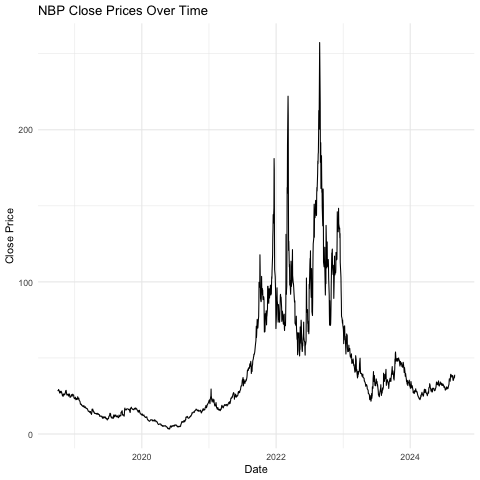

In [28]:
%%R
library(ggplot2)

# Assuming the 'nbp' dataframe has a 'Date' column
ggplot(nbp, aes(x = as.Date(Date), y = CLOSE)) +
    geom_line() +
    labs(title = "NBP Close Prices Over Time", x = "Date", y = "Close Price") +
    theme_minimal()

In [29]:
%%R
library(kableExtra)

# Transpose the dataframe
transposed_results <- t(as.matrix(results[, -1])) # Remove the Hub column and transpose

# Convert to dataframe for better manipulation
transposed_df <- as.data.frame(transposed_results)

# Set row names as a column for the LaTeX output
transposed_df$Statistic <- rownames(transposed_df)
rownames(transposed_df) <- NULL

# Reorder the columns so Statistic is first
transposed_df <- transposed_df[, c(ncol(transposed_df), 1:(ncol(transposed_df) - 1))]

hub_names <- results[['Hub']]

latex_table <- kbl(transposed_df, format = "latex", booktabs = TRUE, col.names = c("Statistic", hub_names)) %>%
  kable_styling(latex_options = c("hold_position")) # Keep the table at the position in the document

# Print the LaTeX table
cat(latex_table)

\begin{table}[!h]
\centering
\begin{tabular}[t]{llll}
\toprule
Statistic & NBP & THE & TTF\\
\midrule
Mean & 41.242 & 46.366 & 46.037\\
SD & 38.365 & 48.857 & 48.737\\
Skewness & 1.8621 & 2.1434 & 2.1481\\
Kurtosis & 6.7830 & 8.0624 & 8.1111\\
JB\_Test & 1814.2*** & 2832.8*** & 2869.8***\\
\addlinespace
Ljung\_Box & 7253.4*** & 7437.6*** & 7435.9***\\
KPSS & 5.4219*** & 5.0059*** & 5.0023***\\
ADF & -2.9848 & -2.2454 & -2.2424\\
\bottomrule
\end{tabular}
\end{table}

In [30]:
%%R

hub1 <- nbp
hub2 <- ttf

hubs <- data.frame(hub1 = hub1$CLOSE, hub2 = hub2$CLOSE)
johansen_test_all_hubs <- ca.jo(hubs, type="trace", ecdet="none", spec="longrun")

summary(johansen_test_all_hubs)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.017437875 0.003391326

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  5.24  6.50  8.18 11.65


r = 0  | 32.39 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           hub1.l2   hub2.l2
hub1.l2  1.0000000  1.000000
hub2.l2 -0.7160428 -1.496456

Weights W:
(This is the loading matrix)

           hub1.l2     hub2.l2
hub1.d -0.05867338 0.006015453
hub2.d -0.03063507 0.007994856



In [31]:
%%R
combined_hubs <- data.frame( 
                            #peg = peg$CLOSE, 
                            ttf = ttf$CLOSE,
                            the = the$CLOSE, 
                            nbp = nbp$CLOSE 
                            #ztp = ztp$CLOSE
)

In [32]:
%%R
lags <- data.frame(
    ttf_the = 5,
    ttf_nbp = 6,
    the_nbp = 5

)

In [33]:
%%R

hub_pairs <- combn(names(combined_hubs), 2, simplify = FALSE)

results <- data.frame()

for (pair in hub_pairs) {
  selected_hubs <- combined_hubs[, pair]

  K <- lags[paste(pair[1], "_", pair[2], sep = "")][[1]] + 1

  jotest <- ca.jo(selected_hubs, type="trace", ecdet="none", spec="longrun", K = K)
  
  test_stats <- jotest@teststat
  crit_values_5pct <- jotest@cval[,2]
  
  coefficients_first_column <- jotest@V[,1]

  temp_df <- data.frame(
    Pair = paste(pair[1], "-", pair[2]),
    Lags = (K - 1),
    H0 = c("r <= 1", "r = 0"),
    H1 = c("r > 1", "r > 1"),
    Test_Statistic = round(test_stats, 2),
    Critical_Value = crit_values_5pct
  )

  results <- rbind(results, temp_df)
}
rownames(results) <- NULL
print(results)


       Pair Lags     H0    H1 Test_Statistic Critical_Value
1 ttf - the    5 r <= 1 r > 1           4.64           8.18
2 ttf - the    5  r = 0 r > 1          56.91          17.95
3 ttf - nbp    6 r <= 1 r > 1           3.99           8.18
4 ttf - nbp    6  r = 0 r > 1          24.34          17.95
5 the - nbp    5 r <= 1 r > 1           3.80           8.18
6 the - nbp    5  r = 0 r > 1          26.98          17.95


In [43]:
%%R
hub1_name <- "the"
hub2_name <- "nbp"
hub1 <- combined_hubs[[hub1_name]]
hub2 <- combined_hubs[[hub2_name]]
hubs <- data.frame(hub1 = hub1, hub2 = hub2)
lag <- lags[paste(hub1_name, "_", hub2_name, sep = "")][[1]]
hs <- tsDyn:::TVECM.HStest(hubs, lag = lag, ngridTh = 300, nboot = 100)
summary(hs)

## Test of linear versus threshold cointegration of Hansen and Seo (2002) ##

Test Statistic:	 37.17732	(Maximized for threshold value: -6.890663 )
P-Value:	 0.12 		( Fixed regressor bootstrap )

Critical values:
    0.90%    0.95%    0.99%
 37.70142 40.08694 44.70146
Number of bootstrap replications:	 1000 

Cointegrating value (estimated under restricted linear model): -1.3862 


In [35]:
%%R
latex_table <- kbl(
  results, 
  format = "latex", 
  booktabs = TRUE, 
  col.names = c("Pair", "Lags", "H0", "H1", "Test Statistic", "Critical Value")
) %>%
  kable_styling(latex_options = c("hold_position")) # Keep the table at the specified position in LaTeX

# Print the LaTeX table
cat(latex_table)

\begin{table}[!h]
\centering
\begin{tabular}[t]{lrllrr}
\toprule
Pair & Lags & H0 & H1 & Test Statistic & Critical Value\\
\midrule
ttf - the & 5 & r <= 1 & r > 1 & 4.64 & 8.18\\
ttf - the & 5 & r = 0 & r > 1 & 56.91 & 17.95\\
ttf - nbp & 6 & r <= 1 & r > 1 & 3.99 & 8.18\\
ttf - nbp & 6 & r = 0 & r > 1 & 24.34 & 17.95\\
the - nbp & 5 & r <= 1 & r > 1 & 3.80 & 8.18\\
\addlinespace
the - nbp & 5 & r = 0 & r > 1 & 26.98 & 17.95\\
\bottomrule
\end{tabular}
\end{table}

In [36]:
%%R
jotest = ca.jo(combined_hubs, type="trace", ecdet="const", spec="longrun")

In [37]:
%%R
test(jotest)

Error in test(jotest) : could not find function "test"


RInterpreterError: Failed to parse and evaluate line 'test(jotest)\n'.
R error message: 'Error in test(jotest) : could not find function "test"'

In [12]:
%%R
# Loop through the results dataframe to generate plots for each pair
for (i in seq(1, nrow(results), by = 2)) {
  # Extract the hub pair and coefficient
  pair <- results$Pair[i]
  hubs <- unlist(strsplit(pair, " - "))
  
  # Extract the relevant coefficient
  coefficient <- results$Coefficient.1[i + 1]  # Coefficient for r = 0
  
  # Calculate the spread
  spread <- combined_hubs[[hubs[1]]] + coefficient * combined_hubs[[hubs[2]]]
  
  print(pair)
  print(adf.test(spread, k=5))
}


[1] "nbp - peg"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -5.5732, Lag order = 5, p-value = 0.01
alternative hypothesis: 

stationary

[1] "nbp - the"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -5.0076, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "nbp - ttf"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -5.081, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "nbp - ztp"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -5.5803, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "peg - the"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -4.6626, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "peg - ttf"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -4.6385, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "peg - ztp"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -4.7976, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary

[1] "the - ttf"

	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fu

In addition: Warning messages:
1: In adf.test(spread, k = 5) : p-value smaller than printed p-value
2: In adf.test(spread, k = 5) : p-value smaller than printed p-value
3: In adf.test(spread, k = 5) : p-value smaller than printed p-value
4: In adf.test(spread, k = 5) : p-value smaller than printed p-value
5: In adf.test(spread, k = 5) : p-value smaller than printed p-value
6: In adf.test(spread, k = 5) : p-value smaller than printed p-value
7: In adf.test(spread, k = 5) : p-value smaller than printed p-value
8: In adf.test(spread, k = 5) : p-value smaller than printed p-value
9: In adf.test(spread, k = 5) : p-value smaller than printed p-value
10: In adf.test(spread, k = 5) : p-value smaller than printed p-value


In [13]:
%%R

# Initialize a data frame to store the spreads
spreads <- data.frame(Time = rownames(combined_hubs))

# Loop through the results dataframe to calculate each spread
for (i in seq(1, nrow(results), by = 2)) {
  # Extract the hub pair and coefficient
  pair <- results$Pair[i]
  hubs <- unlist(strsplit(pair, " - "))
  
  # Extract the relevant coefficient for r = 0
  coefficient <- results$Coefficient.1[i + 1]  
  
  # Calculate the spread
  spread <- combined_hubs[[hubs[1]]] + coefficient * combined_hubs[[hubs[2]]]
  
  # Store the spread in the spreads data frame with a column named after the pair
  spreads[[paste(hubs[1], hubs[2], sep = "_")]] <- spread
}



